## Review steps

1. Data collection
2. Data preprocessing
3. train-test split
4. Choosing ml/dl model
5. Train model
6. Do prediction and evaluate the model

In [23]:
import numpy as np # linear algebra import pandas
from numpy import array
import pandas as pd
import math 
import seaborn as sns 
import datetime as dt 
from datetime import datetime
sns.set_style("whitegrid") 
from pandas.plotting import autocorrelation_plot 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot" )
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from tqdm import tqdm
from sklearn.svm import SVR

## Loading data

In [24]:
data= pd.read_csv("Honda-2.csv",delimiter=";")
data

,Date,Price,Open,High,Low,Volume,Change
0,04/01/2018,"1328,70","1308,30","1328,70","1302,00","14890000,0","0,032200"
1,05/01/2018,"1340,30","1333,30","1351,30","1330,00","14300000,0","0,008700"
2,09/01/2018,"1336,70","1347,30","1352,30","1332,30","10340000,0","-0,002700"
3,10/01/2018,"1367,30","1345,00","1383,70","1342,70","14080000,0","0,022900"
4,11/01/2018,"1342,00","1345,00","1351,70","1332,70","12090000,0","-0,018500"
...,...,...,...,...,...,...,...
1447,08/12/2023,"1458,00","1488,00","1490,00","1450,50","28600000,0","-0,025700"
1448,11/12/2023,"1494,50","1496,00","1501,00","1486,50","14850000,0","0,025000"
1449,12/12/2023,"1477,50","1501,00","1502,00","1477,50","11320000,0","-0,011400"
1450,13/12/2023,"1469,00","1476,50","1477,00","1456,00","14080000,0","-0,005800"


## Data Exploration

In [25]:
# Check the data type of each value column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1452 non-null   object
 1   Price   1452 non-null   object
 2   Open    1452 non-null   object
 3   High    1452 non-null   object
 4   Low     1452 non-null   object
 5   Volume  1452 non-null   object
 6   Change  1452 non-null   object
dtypes: object(7)
memory usage: 79.5+ KB


In [26]:
# Reformat the date data type
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')  # Ví dụ cho định dạng dd/mm/yyyy
data['Date']

0      2018-01-04
1      2018-01-05
2      2018-01-09
3      2018-01-10
4      2018-01-11
          ...    
1447   2023-12-08
1448   2023-12-11
1449   2023-12-12
1450   2023-12-13
1451   2023-12-14
Name: Date, Length: 1452, dtype: datetime64[ns]

In [27]:
# Clean data and cast data for calculation
data['Price'] = data['Price'].str.replace(',', '.').astype(float)
data['Open'] = data['Open'].str.replace(',', '.').astype(float)
data['High'] = data['High'].str.replace(',', '.').astype(float)
data['Low'] = data['Low'].str.replace(',', '.').astype(float)
data['Volume'] = data['Volume'].str.replace(',', '.').astype(float)
data['Change'] = data['Change'].str.replace(',', '.').astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1452 non-null   datetime64[ns]
 1   Price   1452 non-null   float64       
 2   Open    1452 non-null   float64       
 3   High    1452 non-null   float64       
 4   Low     1452 non-null   float64       
 5   Volume  1452 non-null   float64       
 6   Change  1452 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 79.5 KB


In [28]:
# Gets descriptive statistical information about a DataFrame or a Series
data.describe()

,Date,Price,Open,High,Low,Volume,Change
count,1452,1452.000000,1452.000000,1452.000000,1452.000000,1.452000e+03,1452.000000
mean,2020-12-26 16:00:59.504132352,1105.688912,1106.123485,1115.705579,1095.946556,1.393168e+07,0.000222
min,2018-01-04 00:00:00,711.800000,717.200000,746.700000,706.700000,3.360000e+06,-0.071000
25%,2019-07-01 18:00:00,995.375000,995.725000,1005.600000,986.525000,1.040000e+07,-0.010100
50%,2020-12-28 12:00:00,1087.000000,1088.300000,1097.150000,1078.150000,1.284000e+07,0.000000
75%,2022-06-24 18:00:00,1172.700000,1174.400000,1181.325000,1163.850000,1.624750e+07,0.010225
max,2023-12-14 00:00:00,1802.300000,1802.300000,1821.000000,1780.000000,4.645000e+07,0.106200
std,NaN,183.522697,184.289369,184.962911,182.567989,5.240151e+06,0.018327


## Data Visualization

In [29]:
# Reshape turns df into a NumPy array of size (-1, 1)
df=data['Price'].values
df = df.reshape(-1, 1)

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # Perform data normalization according to the min-max scaling method
price_scaled=scaler.fit_transform(df) # Fit và transform the data
price_scaled

array([[0.56570381],
       [0.57634113],
       [0.57303989],
       ...,
       [0.70215497],
       [0.69436039],
       [0.62696011]])

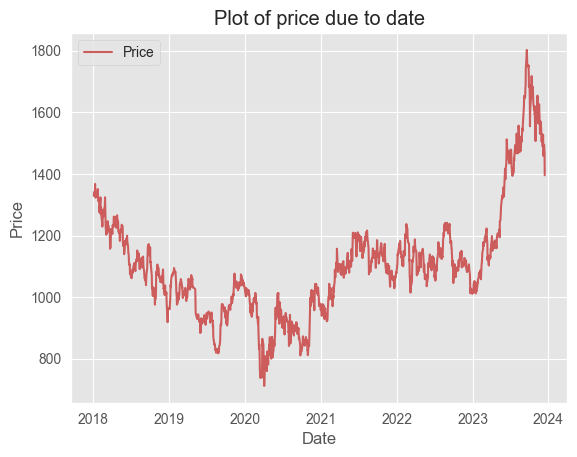

In [31]:
# Create plot
plt.figure(figure=(10,6))
plt.plot(data['Date'],data['Price'].values, label="Price", color="IndianRed")

# Adding title
plt.title("Plot of price due to date")

# Adding label
plt.xlabel("Date")
plt.ylabel("Price")

# Show the plot
plt.legend()
plt.show()

## Data Preprocessing

### Split data into training and testing set

### Training - testing 8:2

In [32]:
# Split train test validation in ratio 8:2
# Split the data into training, testing
train_size = int(0.8 * len(data))
test_size = int(0.2 * len(data))

X2D = data[['High']] # Independent variable in 2-dimensional array
Y2D = data[['Price']] # Dependent variable in 2-dimensional array

In [33]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

y_train = Y2D[:train_size]
x_train = X2D[:train_size]
y_test = Y2D[train_size:]
x_test = X2D[train_size:]
y_train_index = y_train.index # Get the index before converting it to a 2-dimensional array (serves plot)
y_train = Y2D[:train_size].values.ravel()

# Create SVR model with RBF kernel
model = SVR(kernel='rbf')
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],             
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  
    'epsilon': [0.001, 0.01, 0.1, 1, 10]     
}

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Train the model using grid search
svr_rbf = grid_search.fit(x_train,y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)

Best parameters: {'C': 1000, 'epsilon': 0.001, 'gamma': 'scale'}
Best score: 532.1959376430601


In [34]:
y_pred = svr_rbf.predict(x_test)
y_pred

array([1071.26383269, 1072.87326539, 1091.92650446, 1084.42791072,
       1094.75022198, 1089.39220804, 1086.01948927, 1082.27431533,
       1090.98722537, 1102.62843212, 1114.95653282, 1110.73950971,
       1104.54547785, 1116.93382067, 1131.04948721, 1136.19291875,
       1131.35678859, 1138.57276748, 1150.03180173, 1145.22883467,
       1089.39220804, 1110.3495596 , 1103.29846302, 1105.21842913,
       1100.43362563, 1101.67293021, 1106.85721656, 1113.28380515,
       1128.29205359, 1126.25962934, 1118.92126156, 1123.22822039,
       1104.54547785, 1109.76536332, 1111.71610115, 1098.24836866,
       1084.42791072, 1089.39220804, 1091.26892068, 1082.55528204,
       1089.76733016, 1086.30038937, 1102.34157602, 1097.86922034,
       1096.63868529, 1091.26892068, 1072.87326539, 1077.58492884,
       1027.15799965, 1035.72550149, 1010.12577313, 1023.6289988 ,
       1026.12083796, 1011.16180686, 1003.93137593, 1012.19865034,
       1011.16180686, 1027.77991553, 1040.12344463, 1061.40010

In [35]:
last_row = data.tail(1)
last_data = last_row['Price'].values.reshape(-1,1)
last_data

array([[1395.5]])

In [36]:
x_next_30_days = []
for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_days.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)
x_next_30_days

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with f

[array([1363.96988456]),
 array([1351.45920401]),
 array([1341.79593624]),
 array([1333.1789756]),
 array([1324.89660478]),
 array([1316.56895771]),
 array([1307.96496685]),
 array([1298.94839308]),
 array([1289.46715513]),
 array([1279.55778224]),
 array([1269.34764814]),
 array([1259.03987502]),
 array([1248.87280032]),
 array([1239.06228079]),
 array([1229.75114191]),
 array([1220.98823915]),
 array([1212.73932414]),
 array([1204.91419832]),
 array([1197.39351668]),
 array([1190.0475126]),
 array([1182.74673289]),
 array([1175.36812326]),
 array([1167.80017468]),
 array([1159.95026022]),
 array([1151.75632164]),
 array([1143.20312264]),
 array([1134.33939703]),
 array([1125.28667154]),
 array([1116.22742736]),
 array([1107.36697506])]

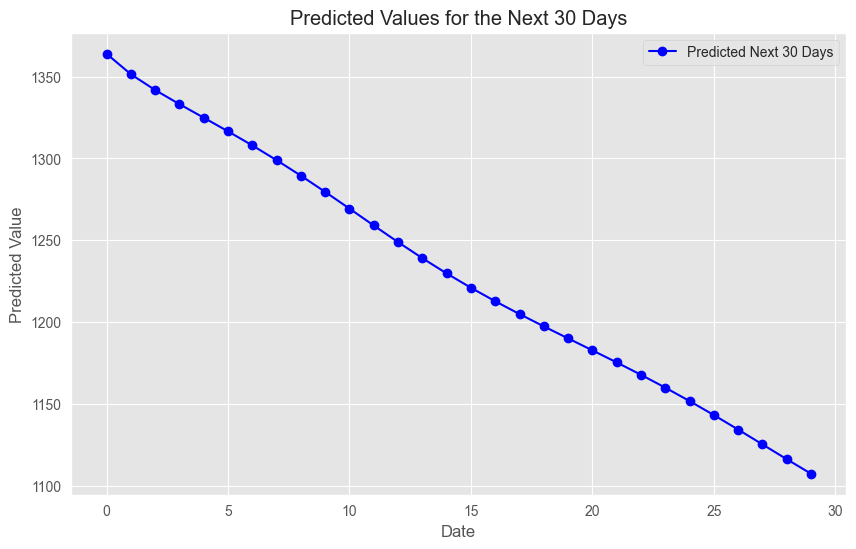

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(x_next_30_days, marker='o', color='b', label='Predicted Next 30 Days')

plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.legend()

plt.show()

In [38]:
y_pred = y_pred.reshape(-1,1)

In [39]:
# Create index for the next 30 days
last_index =  data.index[-1]
next_30_dates = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

In [42]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
# RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', str(test_mape*100)+'%')
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)
# Huber loss
hl= mean_squared_error(y_test, y_pred, multioutput='raw_values')
print('Huber loss:', hl)

Testing RMSE: 287.4188649083281
Testing MAPE: 10.942715554059216%
Testing MAE: 173.32411402058963
Huber loss: [82609.60390519]


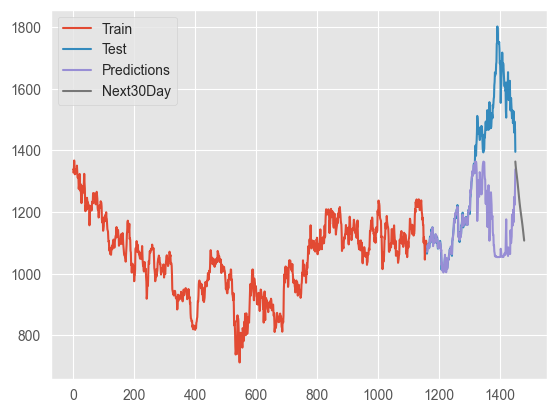

In [41]:
plt.plot(y_train_index, y_train)
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, y_pred)
plt.plot(next_30_dates,x_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()